In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy import units as u
from pathlib import Path
import scipy

import setigen as stg

IMG_DIR = Path("../../docs/source/images/")

In [15]:
# Sometimes it can be necessary to re-run this command for plots to show automatically
%matplotlib inline

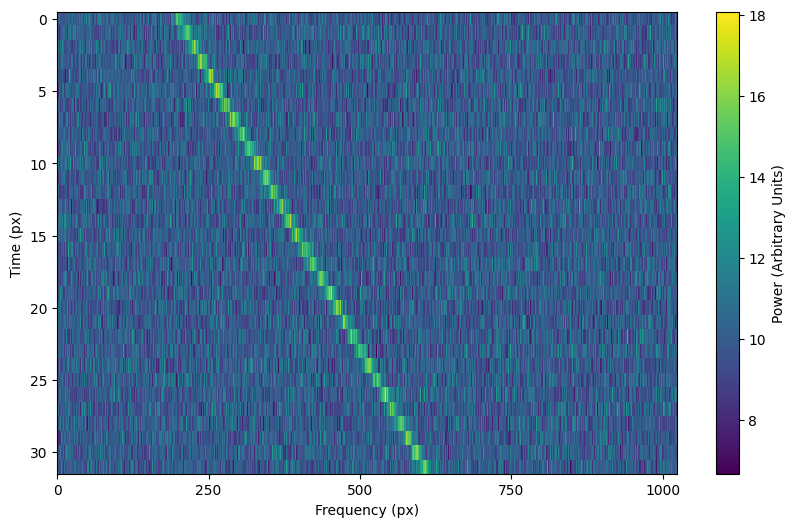

In [16]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot(xtype="px", db=False)
plt.savefig(IMG_DIR / "gs_synth.png", bbox_inches='tight')
plt.show()

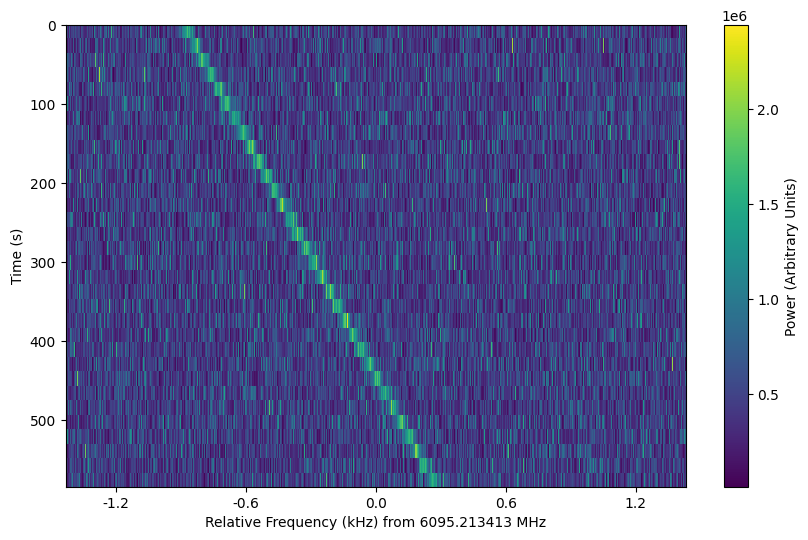

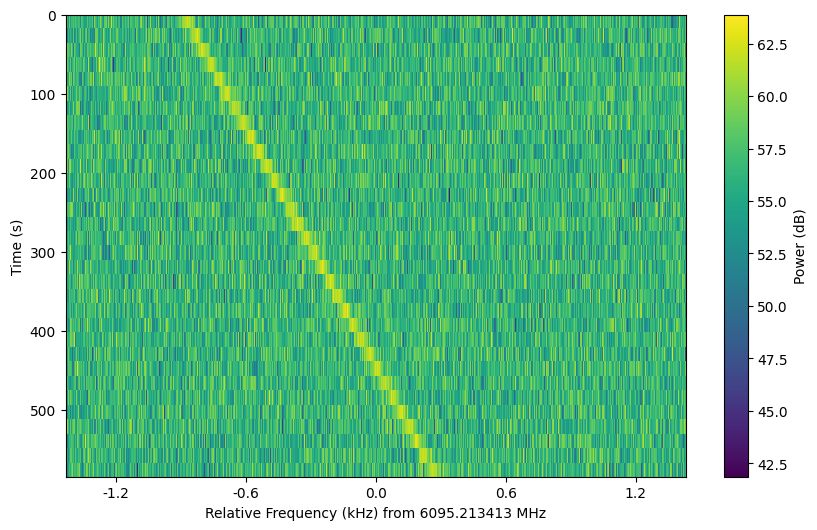

In [17]:
frame = stg.Frame("../../setigen/assets/sample.fil")
data = frame.data

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz,
                  data=data)
frame.add_signal(stg.constant_path(f_start=frame.get_frequency(200),
                                   drift_rate=2*u.Hz/u.s),
                 stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                 stg.gaussian_f_profile(width=40*u.Hz),
                 stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot(db=False)
plt.savefig(IMG_DIR / "gs_obs.png", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 6))
frame.plot()
plt.savefig(IMG_DIR / "gs_obs_db.png", bbox_inches='tight')
plt.show()